In [68]:
#import packages, plotly is used for plots, base64 is used for reading pictures in the notebook
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import base64

## EDA 

In [69]:
df = pd.read_csv('candy-data.csv')
df.head()


competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
3   46.116505  
4   52.341465

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [71]:
# Drop rows where all properties are zero zero
check_cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat','crispedricewafer','bar','pluribus']
print(len(df))
df = df.loc[~(df[check_cols] == 0).all(axis=1)]
print(len(df))
df.info()

85
83
<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    83 non-null     object 
 1   chocolate         83 non-null     int64  
 2   fruity            83 non-null     int64  
 3   caramel           83 non-null     int64  
 4   peanutyalmondy    83 non-null     int64  
 5   nougat            83 non-null     int64  
 6   crispedricewafer  83 non-null     int64  
 7   hard              83 non-null     int64  
 8   bar               83 non-null     int64  
 9   pluribus          83 non-null     int64  
 10  sugarpercent      83 non-null     float64
 11  pricepercent      83 non-null     float64
 12  winpercent        83 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 9.1+ KB


#### It turns out two rows were empty. The rest looks fine! No missing values, nice!


count    83.000000
mean     50.584908
std      14.748880
min      22.445341
25%      39.163280
50%      48.982651
75%      60.332349
max      84.180290
Name: winpercent, dtype: float64


C:\Users\Korhan\AppData\Local\Temp\ipykernel_13848\812264885.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Korhan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='winpercent', ylabel='Density'>

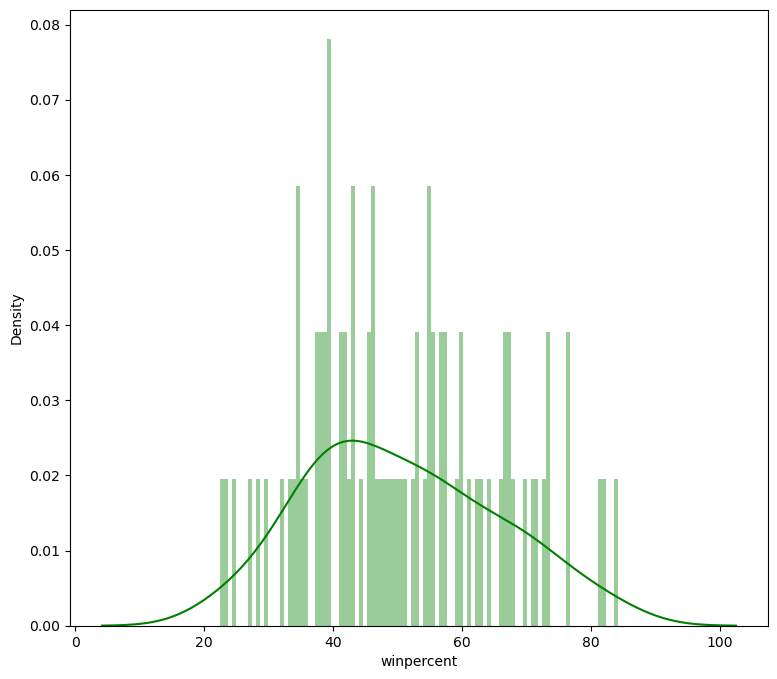

In [72]:
print(df['winpercent'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['winpercent'], color='g', bins=100, hist_kws={'alpha': 0.4})

#### We see that win percentage is  slightly left skewed. This means that higher observations are less likely to be observed.

array([[<Axes: title={'center': 'chocolate'}>,
        <Axes: title={'center': 'fruity'}>,
        <Axes: title={'center': 'caramel'}>],
       [<Axes: title={'center': 'peanutyalmondy'}>,
        <Axes: title={'center': 'nougat'}>,
        <Axes: title={'center': 'crispedricewafer'}>],
       [<Axes: title={'center': 'hard'}>,
        <Axes: title={'center': 'bar'}>,
        <Axes: title={'center': 'pluribus'}>],
       [<Axes: title={'center': 'sugarpercent'}>,
        <Axes: title={'center': 'pricepercent'}>,
        <Axes: title={'center': 'winpercent'}>]], dtype=object)

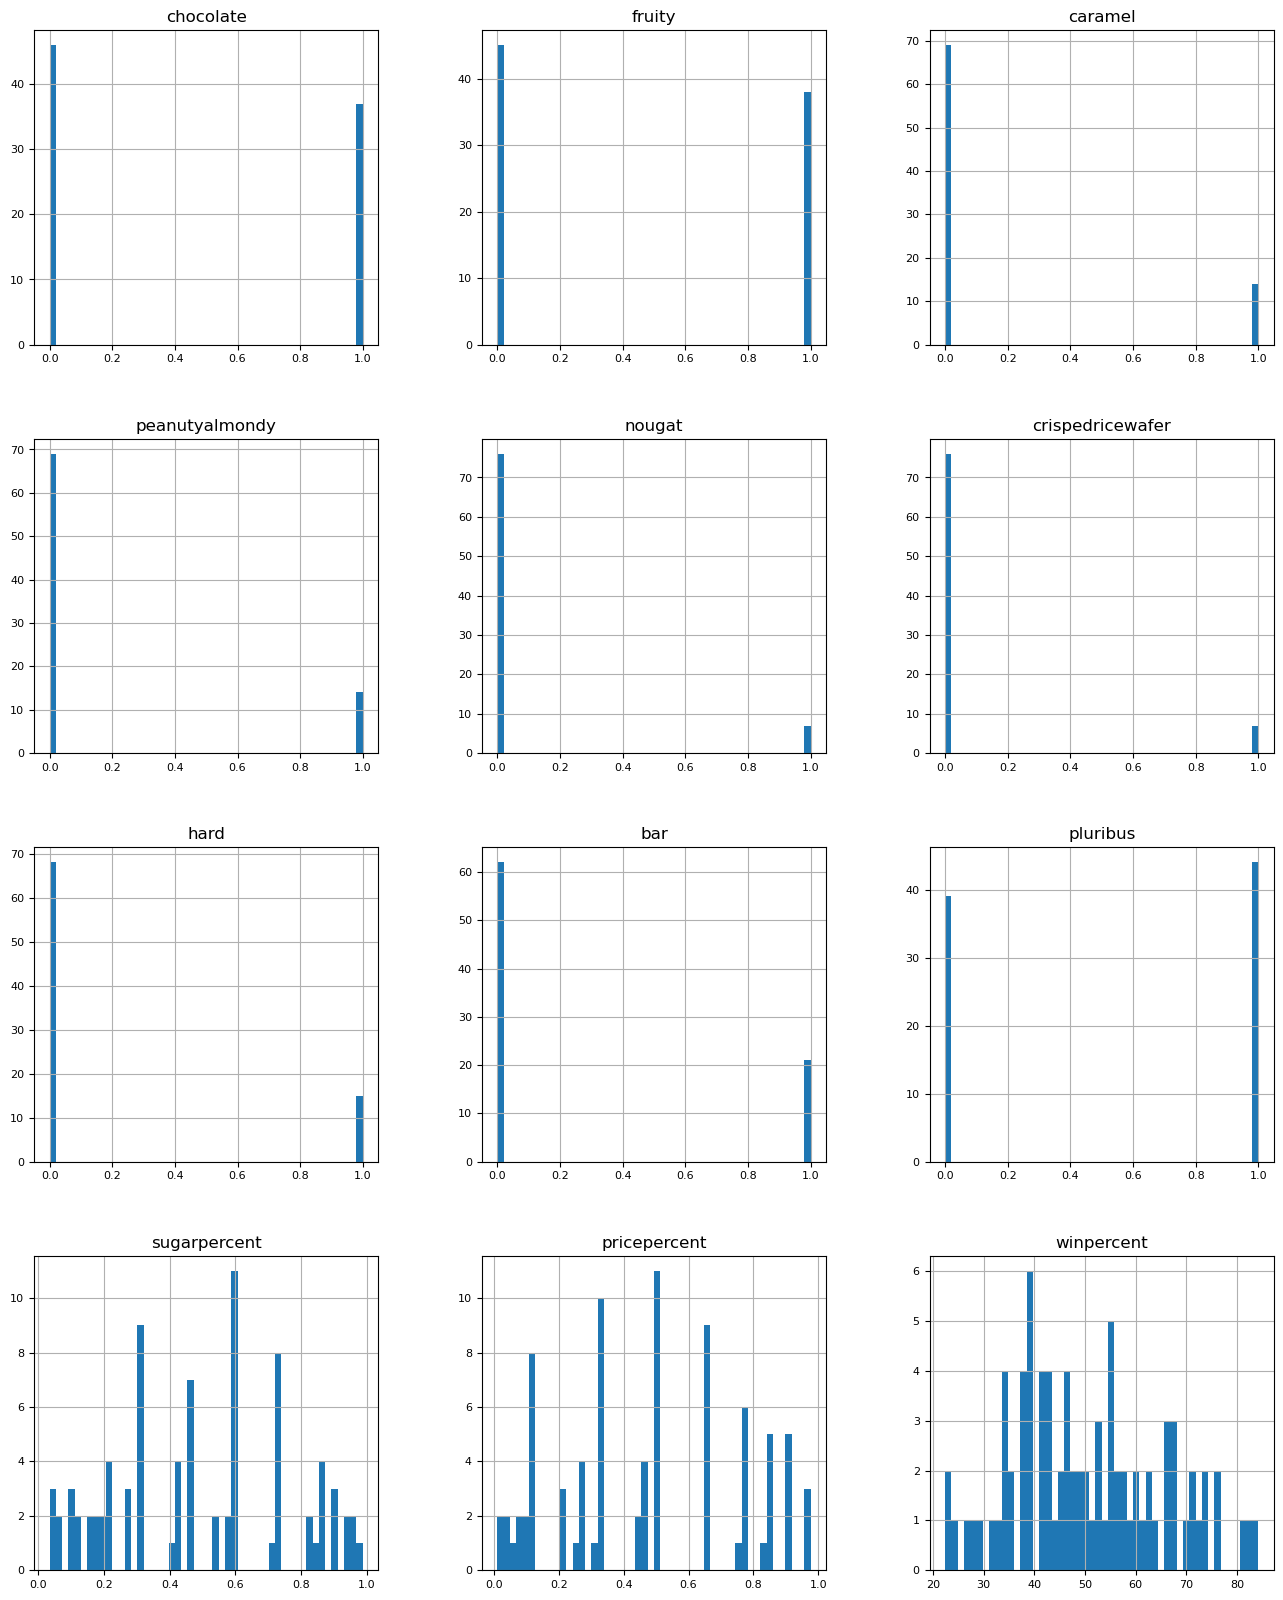

In [73]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [74]:
# Dropping string variable
df_t = df.drop('competitorname', axis=1)
df_num_corr = df_t.corr()['winpercent']
golden_features_list = df_num_corr[abs(df_num_corr) >= 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Win Percentage:\n{}".format(len(golden_features_list), golden_features_list))

There are 2 strongly correlated values with Win Percentage:
winpercent    1.000000
chocolate     0.632373
Name: winpercent, dtype: float64


#### We see winpercent is correlated with whether it contains chocolate or not.
#### Lets look deeper into that!

C:\Users\Korhan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



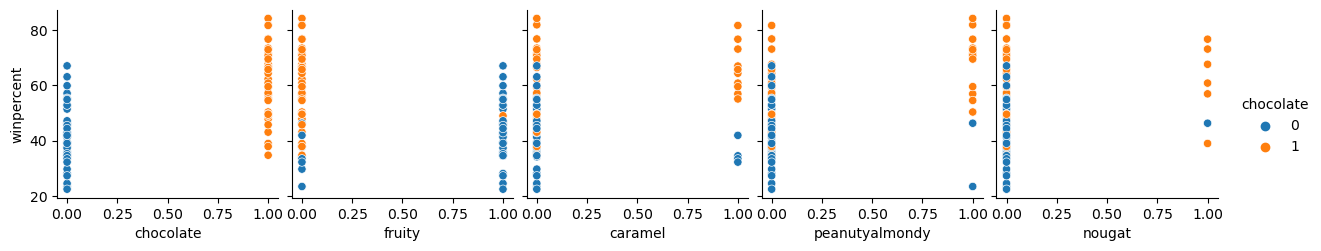

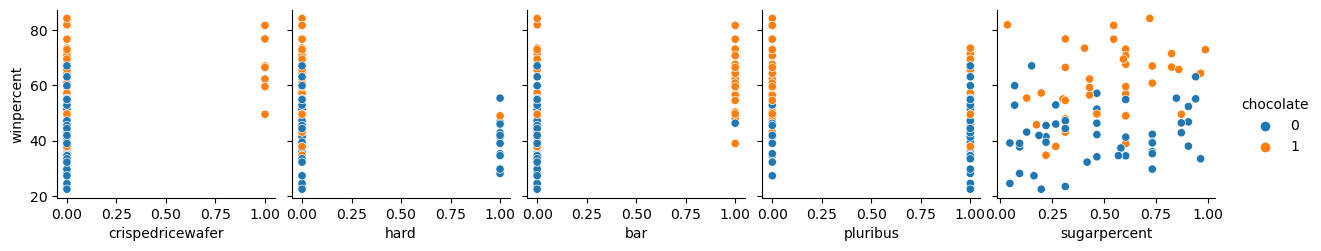

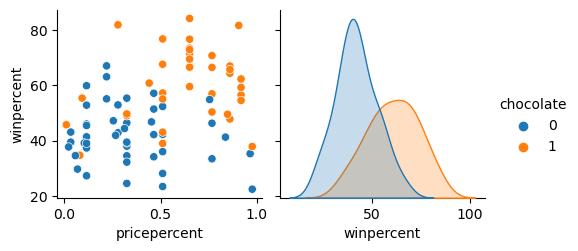

In [75]:
for i in range(0, len(df_t.columns), 5):
    sns.pairplot(data=df_t,
                x_vars=df_t.columns[i:i+5],
                y_vars=['winpercent'],
                hue = 'chocolate')

#### There is no clear relation between winpercent-sugarpercent, winpercent-pricepercent
#### So we can not tell that candys that contain more sugar are more liked, or higher priced candies are more favored
#### However, chocolate seems to be important for a high winning percentage. Candies that have high price and win percentage are mostly containing chocolate



####  Lets do a regression!

In [76]:
X = sm.add_constant(df.drop(['competitorname','winpercent'],axis=1))
y = df['winpercent'] 
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     7.747
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           1.27e-08
Time:                        14:04:57   Log-Likelihood:                -307.91
No. Observations:                  83   AIC:                             639.8
Df Residuals:                      71   BIC:                             668.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               32.0167      5.050  

In [77]:
regress = results.params[1:10]
regress.sort_values(ascending = False, inplace=True)
regress.index = regress.index.map({'chocolate' :'Schokolade',
              'peanutyalmondy':'Nuss-Almond',
              'fruity':'Frucht',
              'crispedricewafer':'Keks',
              'caramel':'Karamell',
              'nougat':'Nougat',
              'bar':'Bar',
              'hard': 'Hart',
              'pluribus': 'Mehrere Stücke'})
df_r = pd.DataFrame({'Property':regress.index, 'Values':regress.values})
df_r['Color'] = df_r['Values'].apply(lambda x: 'Negative Wirkung' if x < 0 else 'Positive Wirkung')
df_r.Values = df_r.Values.round(2)

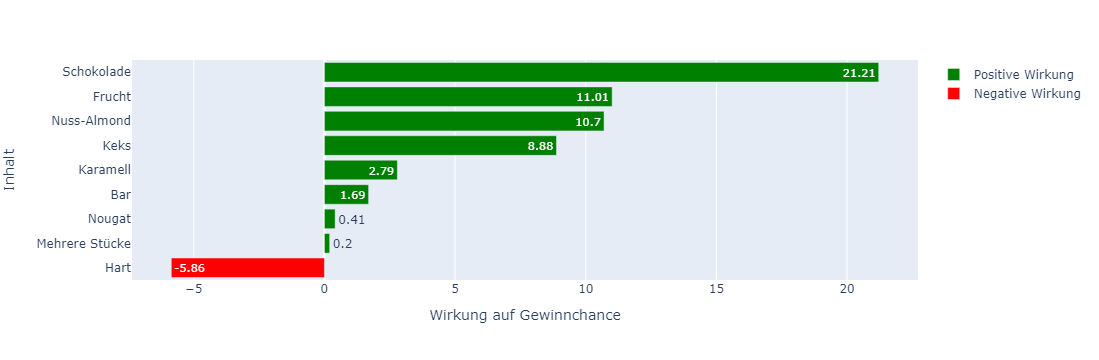

In [78]:
fig = px.bar(
    df_r,
    x='Values',
    y='Property',
    orientation='h',
    color='Color',
    color_discrete_map={'Negative Wirkung': 'red', 'Positive Wirkung': 'green'},
    text = 'Values',
    labels = {'Color':'','Property':'Inhalt',
             'Values':'Wirkung auf Gewinnchance'}
)

# Update layout for better appearance
fig.update_layout(
    yaxis=dict(autorange="reversed")  # Reverse the y-axis for typical horizontal bar plot ordering
)

# Show the plot
fig.show()
fig.write_image("wirkung.png",width=1000, height=400)

#### Here we see the influence of ingredients. However, it is also important how different candies are liked relative to each other. 
#### Lets dive deeper into the analysis!

## Preprocess and General Overview of the Data

In [79]:
#read data and sort by winning percentage and create ranking column
df = df.sort_values( by = 'winpercent', ascending = False)
df.reset_index(drop = True, inplace = True)
df['ranking'] = df.index + 1

In [80]:
# I will convert the price percentages to dollars. The references value will be the most sold candy bar, which is Snickers
# The price of a Snickers is listed as $1.32 at Wallmart
# https://www.walmart.com/ip/Snickers-Full-Size-Candy-Chocolate-Bar-1-86-oz-Bar/38253488
given_percentage = df['pricepercent'][df['competitorname']=='Snickers'].values[0]
given_dollar_value = 1.32

# Calculate the conversion factor
conversion_factor = (given_dollar_value / given_percentage)

# Convert the percentages to dollar values
df['dollar_value'] = (df['pricepercent'] * conversion_factor).round(2)

In [81]:
# Create conditions for labeling whether its fruity, biscuit or not
conditions = [
    (df['chocolate'] == 1) & (df['crispedricewafer'] == 0) & (df['fruity'] == 0) ,
   (df['fruity'] == 1) & (df['hard'] == 0) & (df['chocolate'] == 0) & (df['crispedricewafer'] == 0) ,
    (df['crispedricewafer'] == 1),
    (df['fruity'] == 0) & (df['crispedricewafer'] == 0) & (df['chocolate'] == 0) 
    
]

# Define the corresponding choices
choices = ['Schokoriegel','Fruchtgummi', 'Keks-basiert', 'Andere']

# Create the new column using numpy.select
df['fru_waff'] = np.select(conditions, choices, default='Andere')


In [99]:
#Split dataframe for further analysis based on Fruchtgummi, Keks-basiert, and candies that have above/below
# %50 winning chance
ab_50 = df[df['winpercent' ] >= 50 ]
bl_50 = df[df['winpercent' ] < 50 ]
fr_df = df[df['fru_waff' ]== 'Fruchtgummi']
kecks_df = df[df['fru_waff' ]== 'Keks-basiert']

## General Plots & Analysis

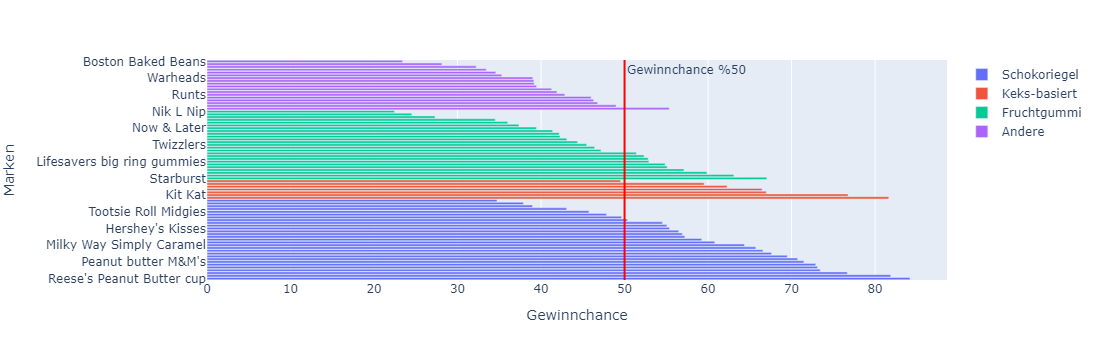

In [39]:
fig = px.bar(
    df, 
    x='winpercent', 
    y='competitorname', 
    orientation='h', 
    color=df.fru_waff,  # Color the bars by category
    labels={'fru_waff': '', 'winpercent':'Gewinnchance','competitorname':'Marken' }  # Customize axis labels
)
# Add a vertical line at x=0.5
fig.add_vline(x=50, line=dict(color='red', width=2), annotation_text="Gewinnchance %50", annotation_position="top right")
# Show the plot
fig.show()
fig.write_image("alle_gewinn.png",width=1000, height=400)

In [66]:
#create summary dataframe for pie chart, takes only the ingredients
property_cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat','crispedricewafer']

def ingredient(df):
    # Sum the binary columns to get the count of candies with each property
    property_counts = df[property_cols].sum()
    property_counts.index =  property_counts.index.map({'chocolate' : 'Schoko', 'fruity': 'Frucht', 'caramel': 'Karamell' , 'peanutyalmondy': 'Nuss-Almond',
                               'nougat' : 'Nougat', 'crispedricewafer' : 'Keks'})
    df_test = pd.DataFrame({'ingredients': property_counts.index, 'value': property_counts.values})
    
    return df_test

color_map = {
            'Schoko': '#636EFA',
            'Frucht': '#00CC96',
            'Karamell': '#FF6692',
            'Nuss-Almond': '#AB63FA',
            'Nougat': '#19D3F3',
            'Keks': '#EF553B'}

In [41]:
ingredient(df)

ingredients  value
0       Schoko     37
1       Frucht     38
2     Karamell     14
3  Nuss-Almond     14
4       Nougat      7
5         Keks      7

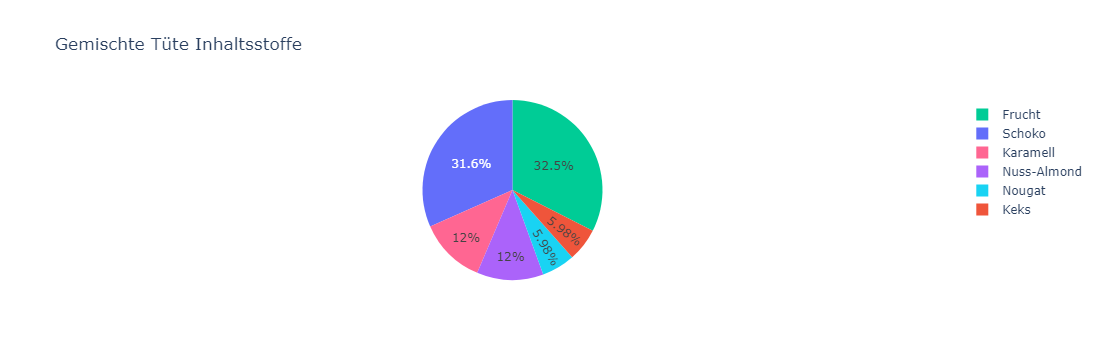

In [42]:
#Create a pie chart that shows the ingredient distrubition

# Create a pie chart using Plotly
fig = px.pie(ingredient(df),
             names='ingredients',
             values = 'value',
             color = 'ingredients',
             color_discrete_map= color_map,
            title='Gemischte Tüte Inhaltsstoffe')
fig.show()
fig.write_image("gemischt_inhalt.png",width=1000, height=400)

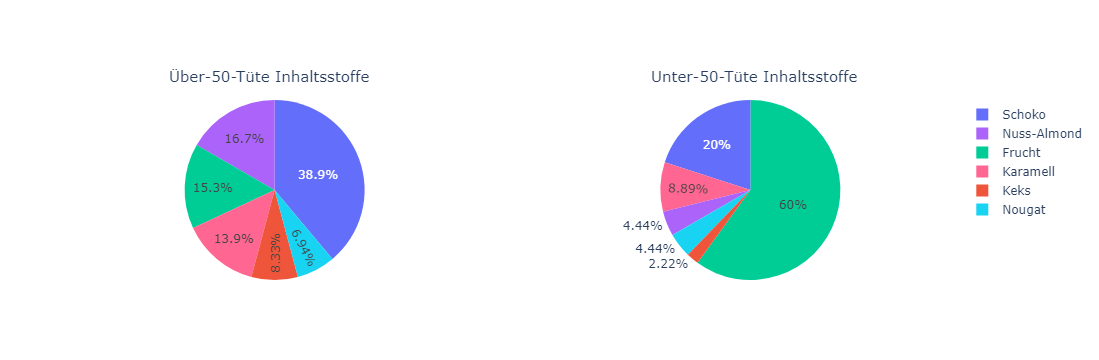

In [43]:
#Create a pie chart that shows the ingredient distrubition

# Create a pie chart using Plotly
fig1 = px.pie(ingredient(ab_50),
             names='ingredients',
             values = 'value',
             color = 'ingredients',
             color_discrete_map=color_map,
            title='Über-50-Tüte Inhaltsstoffe')
# Create a pie chart using Plotly
fig2 = px.pie(ingredient(bl_50),
             names='ingredients',
             values = 'value',
             color = 'ingredients',
             color_discrete_map=color_map,
            title='Unter-50-Tüte Inhaltsstoffe')

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Add the first pie chart to the first subplot
fig.add_trace(fig1.data[0], row=1, col=1)

# Add the second pie chart to the second subplot
fig.add_trace(fig2.data[0], row=1, col=2)

# Update layout for better spacing and titles
fig.update_layout(
    annotations=[
        dict(text='Über-50-Tüte Inhaltsstoffe', x=0.1, y=1.2, font_size=15, showarrow=False),
        dict(text='Unter-50-Tüte Inhaltsstoffe', x=0.9, y=1.2, font_size=15, showarrow=False)
    ]
)


# Display the figure
fig.show()
fig.write_image("alle_tüten_inhalt.png",width=1000, height=400)

In [67]:
# read images 
def img_reader(image_path):
    with open(image_path, 'rb') as f:
        image_base64 = base64.b64encode(f.read()).decode()
    return image_base64

In [108]:
images = [
    {'source': f"data:image/png;base64,{img_reader(image_path = 'C:/Users/Korhan/Downloads/snickers.png')}", 'x': 3, 'y': 9,
    'sizex': 20, 'sizey': 20},
    {'source': "https://s7d2.scene7.com/is/image/hersheysassets/0_34000_00440_9_701_44000_136_Item_Front?fmt=png-alpha&hei=412", 'x': 0, 'y': 75,
    'sizex': 20, 'sizey': 20},
    {'source': f"data:image/png;base64,{img_reader(image_path = 'C:/Users/Korhan/Downloads/twix.png')}", 'x': 3, 'y': 87,
    'sizex': 20, 'sizey': 20},
    {'source': f"data:image/png;base64,{img_reader(image_path = 'C:/Users/Korhan/Downloads/kitkat.png')}", 'x': 4, 'y': 70,
    'sizex': 10, 'sizey': 10},
    {'source': f"data:image/png;base64,{img_reader(image_path = 'C:/Users/Korhan/Downloads/haribo.png')}", 'x': 26, 'y': 65,
    'sizex': 15, 'sizey': 15},
    {'source': f"data:image/png;base64,{img_reader(image_path = 'C:/Users/Korhan/Downloads/skittles.png')}", 'x': 19, 'y': 55,
    'sizex': 10, 'sizey': 10},
    {'source': f"data:image/png;base64,{img_reader(image_path = 'C:/Users/Korhan/Downloads/starburst.jpg')}", 'x': 13, 'y': 55,
    'sizex': 15, 'sizey': 15},
    {'source': f"data:image/png;base64,{img_reader(image_path = 'C:/Users/Korhan/Downloads/niklnip.png')}", 'x': 85, 'y': 30,
    'sizex': 15, 'sizey': 15},
    {'source': f"data:image/png;base64,{img_reader(image_path = 'C:/Users/Korhan/Downloads/sourpatch.png')}", 'x': 22, 'y': 70,
    'sizex': 15, 'sizey': 15}]

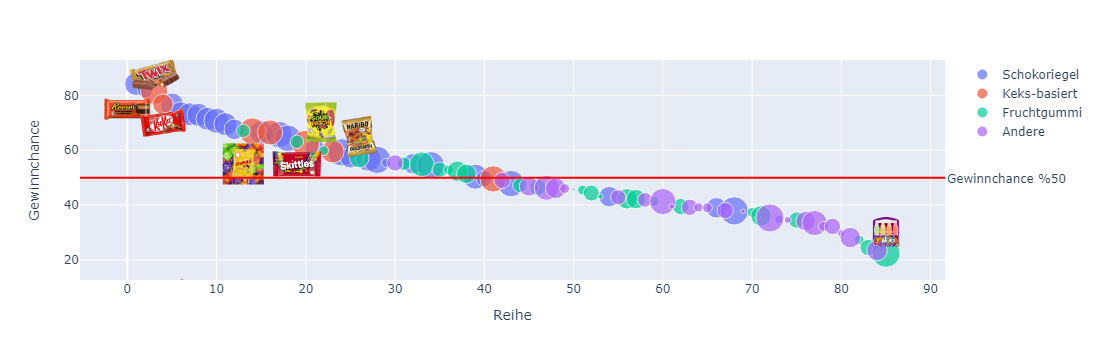

In [109]:
fig = px.scatter(df, x=df.ranking, y="winpercent", color = "fru_waff", size = "dollar_value",
                labels = {'winpercent':'Gewinnchance', 'ranking':'Reihe','fru_waff':''})
for img in images:
    fig.add_layout_image(
        dict(
            source=img['source'],
            xref="x", yref="y",
            x=img['x'], y=img['y'],
            sizex=img['sizex'], sizey=img['sizey'],
            xanchor="center", yanchor="middle",
            
        )
    )
fig.add_hline(y=50, line=dict(color='red', width=2), annotation_text="Gewinnchance %50", annotation_position="right")
fig.show()
fig.write_image("alle_reihe.png",width=1000, height=400)

C:\Users\Korhan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Korhan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Korhan\AppData\Local\Temp\ipykernel_15752\3336646481.py:16: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Korhan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Korhan\AppData\Local\Temp\ipykernel_15752\3336646481.py:21: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disa

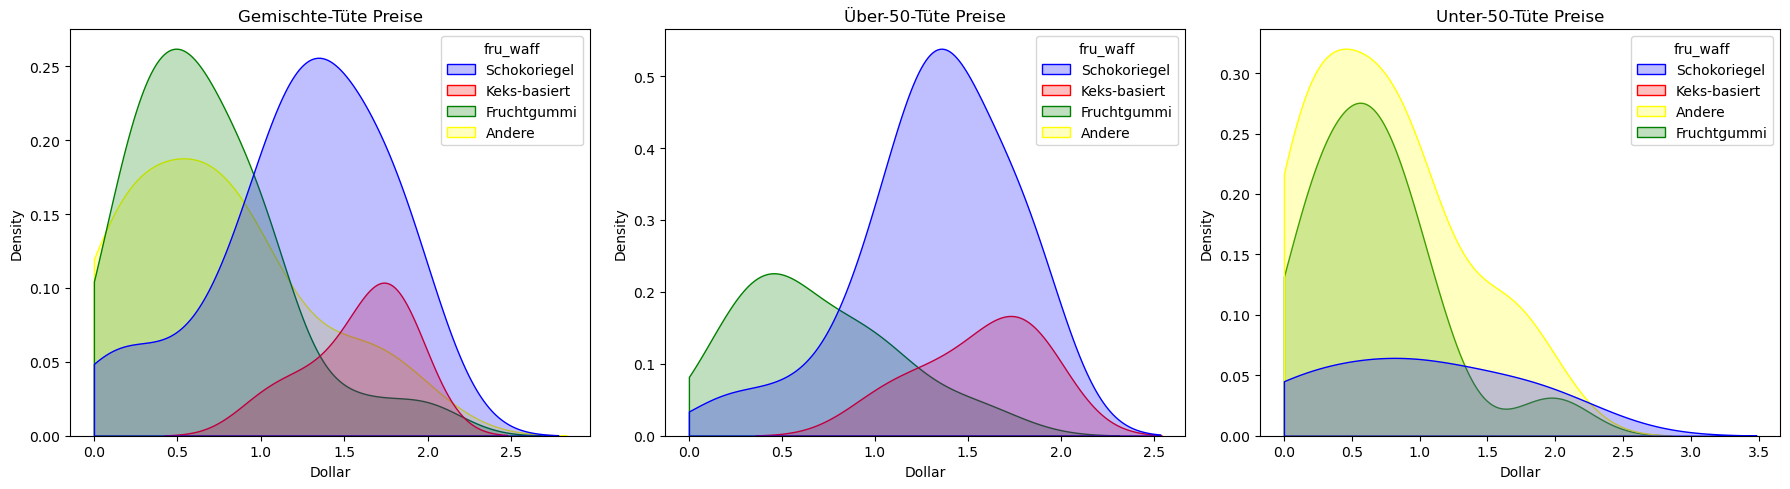

In [112]:
custom_palette = {
    'Schokoriegel': 'blue',
    'Fruchtgummi': 'green',
    'Keks-basiert': 'red',
    'Andere': 'yellow'}

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#Create the distribution plot with hue
sns.kdeplot(df, x='dollar_value', hue='fru_waff',ax=axes[0], fill=True,clip=(0, np.inf), palette=custom_palette)
axes[0].set_title("Gemischte-Tüte Preise")
axes[0].set_xlabel("Dollar")
axes[0].set_ylabel("Density")

sns.kdeplot(ab_50, x='dollar_value', hue='fru_waff',ax=axes[1], fill=True, clip=(0, np.inf), palette=custom_palette)
axes[1].set_title("Über-50-Tüte Preise")
axes[1].set_xlabel("Dollar")
axes[1].set_ylabel("Density")

sns.kdeplot(bl_50, x='dollar_value', hue='fru_waff',ax=axes[2], fill=True,clip=(0, np.inf), palette=custom_palette)
axes[2].set_title("Unter-50-Tüte Preise")
axes[2].set_xlabel("Dollar")
axes[2].set_ylabel("Density")


# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('line_plot.png')
# Display the plots
plt.show()

## Cookie Further Analysis

In [96]:
#significant split at caramel
columns_to_transform = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat','crispedricewafer','hard','pluribus']
kecks_df[columns_to_transform].sum() / len(kecks_df.chocolate)

chocolate           1.000000
fruity              0.000000
caramel             0.428571
peanutyalmondy      0.142857
nougat              0.000000
crispedricewafer    1.000000
hard                0.000000
pluribus            0.142857
dtype: float64

In [103]:
kecks_df[kecks_df.caramel == 0 ].dollar_value.mean()

1.545

In [448]:
print('Number of observations: ', len(kecks_df.competitorname), 'out of', len(df.competitorname))
print('Highest ranking with', kecks_df.ranking.min(), 'has winning chance of', round(kecks_df.winpercent.max(),2)) 
print('Lowes ranking with', kecks_df.ranking.max(), 'has winning chance of', round(kecks_df.winpercent.min(),2)) 
print('Average win chance', kecks_df.winpercent.mean())
print('Peanut&Almond and Nougat almost not observed \nHalf of them are nougat \nAlmost all of them are bars')
print('Price range of cookies with caramel',kecks_df[kecks_df.caramel == 1 ].dollar_value.min(),kecks_df[kecks_df.caramel == 1 ].dollar_value.max())
print('Win range of cookies with caramel',kecks_df[kecks_df.caramel == 1 ].winpercent.min(),kecks_df[kecks_df.caramel == 1 ].winpercent.max())
print('Avg win of cookies with caramel',kecks_df[kecks_df.caramel == 1 ].winpercent.mean())
print('Expected Revenue per unit range with Caramel', ((kecks_df[kecks_df.caramel == 1 ].winpercent/100)*kecks_df[kecks_df.caramel == 1 ].dollar_value).min(),'-',
       ((kecks_df[kecks_df.caramel == 1 ].winpercent/100)*kecks_df[kecks_df.caramel == 1 ].dollar_value).max())
print('Price range of cookies without caramel',kecks_df[kecks_df.caramel == 0 ].dollar_value.min(),kecks_df[kecks_df.caramel == 0 ].dollar_value.max())
print('Win range of cookies without caramel',kecks_df[kecks_df.caramel == 0 ].winpercent.min(),kecks_df[kecks_df.caramel == 0 ].winpercent.max())
print('Avg win of cookies without caramel',kecks_df[kecks_df.caramel == 0 ].winpercent.mean())
print('Expected Revenue per unit range with no Caramel', ((kecks_df[kecks_df.caramel == 0 ].winpercent/100)*kecks_df[kecks_df.caramel == 0 ].dollar_value).min(),'-',
       ((kecks_df[kecks_df.caramel == 0 ].winpercent/100)*kecks_df[kecks_df.caramel == 0 ].dollar_value).max())

Number of observations:  7 out of 85
Highest ranking with 3 has winning chance of 81.64
Lowes ranking with 41 has winning chance of 49.52
Average win chance 66.170252
Peanut&Almond and Nougat almost not observed 
Half of them are nougat 
Almost all of them are bars
Price range of cookies with caramel 1.32 1.84
Win range of cookies with caramel 59.529251 81.642914
Avg win of cookies with caramel 69.38129666666667
Expected Revenue per unit range with Caramel 0.7857861132000001 - 1.5022296176
Price range of cookies without caramel 1.04 1.86
Win range of cookies without caramel 49.524113 76.7686
Avg win of cookies without caramel 63.7619685
Expected Revenue per unit range with no Caramel 0.7983934400000001 - 1.1584913466000002


C:\Users\Korhan\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



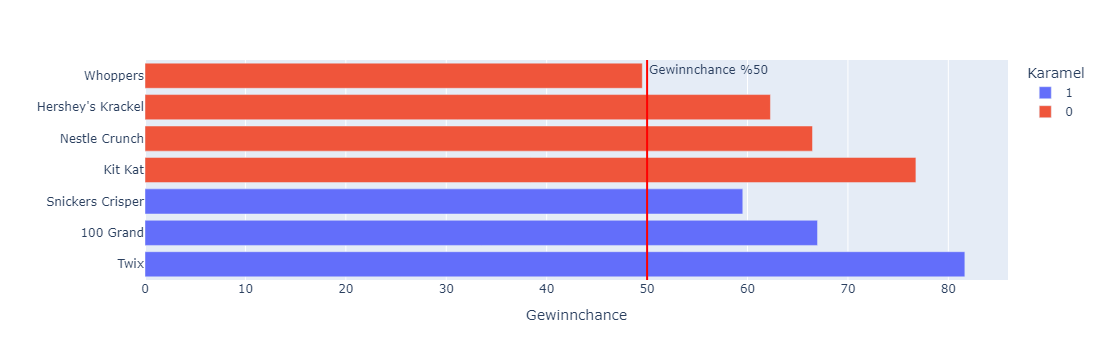

In [78]:
fig = px.bar(
    kecks_df, 
    x= kecks_df.winpercent, 
    y='competitorname', 
    orientation='h', 
    color=kecks_df.caramel.astype('category'),  # Color the bars by category
    labels = {'color' : 'Karamel', 'competitorname': '', 'winpercent':'Gewinnchance'}
)
# Add a vertical line at x=0.5
fig.add_vline(x=50, line=dict(color='red', width=2), annotation_text="Gewinnchance %50", annotation_position="top right")
# Show the plot
fig.show()
fig.write_image("expected_revenue.png",width=1000, height=400)

## Fruit Further analysis

In [101]:
#we see a split at pluribus 
fr_df[columns_to_transform].sum() / len(fr_df.chocolate)

chocolate           0.00
fruity              1.00
caramel             0.04
peanutyalmondy      0.00
nougat              0.00
crispedricewafer    0.00
hard                0.00
pluribus            0.76
dtype: float64

In [100]:
# Create conditions for labeling whether its fruity, biscuit or not
conditions = [
    (fr_df['hard'] == 1) & (fr_df['pluribus'] == 0),
    (fr_df['hard'] == 0) & (fr_df['pluribus'] == 1),
    (fr_df['hard'] == 0) & (fr_df['pluribus'] == 0),
    (fr_df['hard'] == 1) & (fr_df['pluribus'] == 1)
]

# Define the corresponding choices
choices = ['Nicht-gummi und einzel stückig', 'Gummi, Mehrere stücke', 'Gummi, Einzel stück','Nicht-gummi und mehr stückig']

# Create the new column using numpy.select
fr_df['gummi'] = np.select(conditions, choices, default='Gumi, Mehrere stücke')

C:\Users\Korhan\AppData\Local\Temp\ipykernel_13848\3202812584.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
images = [
    {'source': f"data:image/png;base64,{img_reader(image_path = 'C:/Users/Korhan/Downloads/haribo.png')}", 'x': 65, 'y': 'Skittles wildberry',
    'sizex': 10, 'sizey': 10}]

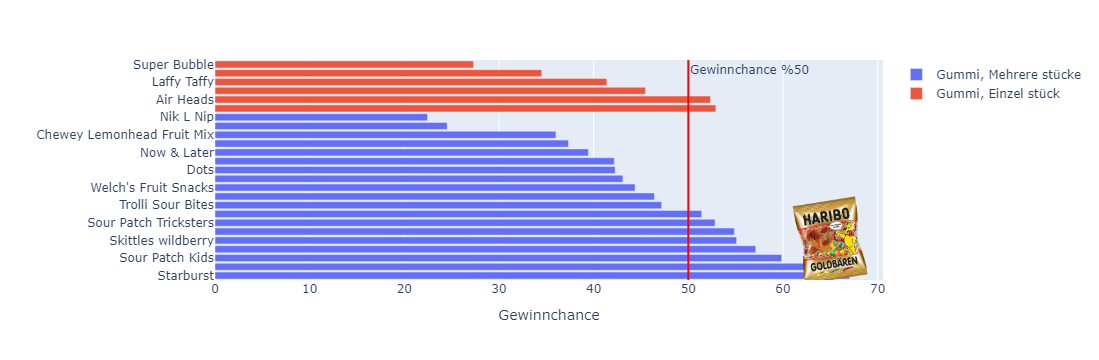

In [48]:
fig = px.bar(
    fr_df, 
    x= fr_df.winpercent,
    y='competitorname', 
    orientation='h', 
    color=fr_df.gummi,  # Color the bars by category
    labels = {'color' : '','competitorname':'','winpercent':'Gewinnchance','gummi':''}
)
for img in images:
    fig.add_layout_image(
        dict(
            source=img['source'],
            xref="x", yref="y",
            x=img['x'], y=img['y'],
            sizex=img['sizex'], sizey=img['sizey'],
            xanchor="center", yanchor="middle"
        )
    )
# Add a vertical line at x=0.5
fig.add_vline(x=50, line=dict(color='red', width=2), annotation_text="Gewinnchance %50", annotation_position="top right")
# Show the plot
fig.show()
fig.write_image("gummi.png",width=1000, height=400)

In [558]:
print('Number of observations: ', len(fr_df.competitorname), 'out of', len(df.competitorname))
print('Highest ranking with', fr_df.ranking.min(), 'has winning chance of', round(fr_df.winpercent.max(),2)) 
print('Lowest ranking with', fr_df.ranking.max(), 'has winning chance of', round(fr_df.winpercent.min(),2)) 
print('They are almost only fruit based. \nThey vary significantly regarding their shape',
     '\nThey are either soft or hard, are multiple pieces in one bag or are one single piece')
print('Price range of gummie with single piece',fr_df[fr_df.gummi == 'Gummi und einzel stückig' ].dollar_value.min(),fr_df[fr_df.gummi == 'Gummi und einzel stückig' ].dollar_value.max())
print('Avg win of gummie with single pieces',fr_df[fr_df.gummi == 'Gummi und einzel stückig' ].winpercent.mean())
print('Win range of gummie with single pieces',fr_df[fr_df.gummi == 'Gummi und einzel stückig' ].winpercent.min(),fr_df[fr_df.gummi == 'Gummi und einzel stückig' ].winpercent.max())
print('Price range of gummie with multiple piece',fr_df[fr_df.gummi == 'Gummi und mehr stückig' ].dollar_value.min(),fr_df[fr_df.gummi == 'Gummi und mehr stückig' ].dollar_value.max())
print('Win range of gummie with multiple piece',fr_df[fr_df.gummi == 'Gummi und mehr stückig'].winpercent.min(),fr_df[fr_df.gummi == 'Gummi und mehr stückig'].winpercent.max())
print('Avg win of gummie with multiple piece',fr_df[fr_df.gummi == 'Gummi und mehr stückig'].winpercent.mean())

Number of observations:  25 out of 85
Highest ranking with 13 has winning chance of 67.04
Lowest ranking with 85 has winning chance of 22.45
They are almost only fruit based. 
They vary significantly regarding their shape 
They are either soft or hard, are multiple pieces in one bag or are one single piece
Price range of gummie with single piece 0.24 1.04
Avg win of gummie with single pieces 42.321707
Win range of gummie with single pieces 27.303865 52.911392
Price range of gummie with multiple piece 0.07 1.98
Win range of gummie with multiple piece 22.445341 67.037628
Avg win of gummie with multiple piece 46.66280021052631


In [94]:
fr_df[fr_df.gummi == 'Gummi, Mehrere stücke' ].dollar_value.mean()

0.72

In [104]:
fr_df

competitorname  chocolate  fruity  caramel  peanutyalmondy  \
12                    Starburst          0       1        0               0   
18            Skittles original          0       1        0               0   
21              Sour Patch Kids          0       1        0               0   
25            Haribo Gold Bears          0       1        0               0   
30           Skittles wildberry          0       1        0               0   
32                 Swedish Fish          0       1        0               0   
34  Lifesavers big ring gummies          0       1        0               0   
35        Sour Patch Tricksters          0       1        0               0   
36                    Air Heads          0       1        0               0   
37            Haribo Sour Bears          0       1        0               0   
43            Trolli Sour Bites          0       1        0               0   
45                   Mike & Ike          0       1        0               0   
49                    Twizzlers          0       1        0               0   
50         Welch's Fruit Snacks          0       1        0               0   
51                  Fruit Chews          0       1        0               0   
54                         Dots          0       1        0               0   
55           Haribo Twin Snakes          0       1        0               0   
57                  Laffy Taffy          0       1        0               0   
60                  Now & Later          0       1        0               0   
68                    Red vines          0       1        0               0   
69   Chewey Lemonhead Fruit Mix          0       1        0               0   
73           Caramel Apple Pops          0       1        1               0   
79                 Super Bubble          0       1        0               0   
80                     Chiclets          0       1        0               0   
82                    Nik L Nip          0       1        0               0   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
12       0                 0     0    0         1         0.151         0.220   
18       0                 0     0    0         1         0.941         0.220   
21       0                 0     0    0         1         0.069         0.116   
25       0                 0     0    0         1         0.465         0.465   
30       0                 0     0    0         1         0.941         0.220   
32       0                 0     0    0         1         0.604         0.755   
34       0                 0     0    0         0         0.267         0.279   
35       0                 0     0    0         1         0.069         0.116   
36       0                 0     0    0         0         0.906         0.511   
37       0                 0     0    0         1         0.465         0.465   
43       0                 0     0    0         1         0.313         0.255   
45       0                 0     0    0         1         0.872         0.325   
49       0                 0     0    0         0         0.220         0.116   
50       0                 0     0    0         1         0.313         0.313   
51       0                 0     0    0         1         0.127         0.034   
54       0                 0     0    0         1         0.732         0.511   
55       0                 0     0    0         1         0.465         0.465   
57       0                 0     0    0         0         0.220         0.116   
60       0                 0     0    0         1         0.220         0.325   
68       0                 0     0    0         1         0.581         0.116   
69       0                 0     0    0         1         0.732         0.511   
73       0                 0     0    0         0         0.604         0.325   
79       0                 0     0    0         0         0.162         0.116   
80       0        